## * PROJECT HOUSE PRICE PREDICTION

In this project,

assume the role of a data scientist tasked with assisting a US-based housing company, Surprise Housing,

as it embarks on expanding into the Australian real estate market. Your primary objective is to develop a machine learning model

that accurately predicts the actual value of potential properties, enabling the company to make informed investment choices.

    

Project Objective: Create a robust machine learning model capable of forecasting house prices in the Australian real estate market.

This predictive tool will serve as a vital asset for Surprise Housing, aiding them in identifying prospective properties

for acquisition. Furthermore, it aims to unveil the significance of variables that influence house prices and

how these variables collectively describe the price of a house.

In [3181]:
# import liberary
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3182]:
# load train dataset
df_train=pd.read_csv(r"/content/Housing-project-train-data.csv")

# load test dataset
df_test=pd.read_csv(r"/content/Hosuing-project-test-data.csv")

In [3183]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [3184]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1163,289,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,122000
1164,554,20,RL,67.0,8777,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Feedr,Norm,1Fam,1Story,4,5,1949,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,Ex,Y,SBrkr,1126,0,0,1126,0,0,2,0,2,1,Gd,5,Typ,0,NaN,Detchd,2002.0,Fin,2,520,TA,TA,N,0,96,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,108000
1165,196,160,RL,24.0,2280,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1976,1976,Gable,CompShg,Plywood,Brk Cmn,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,566,Unf,0,289,855,GasA,TA,Y,SBrkr,855,601,0,1456,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1976.0,Unf,2,440,TA,TA,Y,87,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,148500
1166,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,1Fam,2Story,4,4,1920,1950,Gambrel,CompShg,BrkFace,BrkFace,NaN,0.0,TA,Fa,BrkTil,TA,TA,No,Unf,0,Unf,0,649,649,GasA,TA,N,SBrkr,649,668,0,1317,0,0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1920.0,Unf,1,250,TA,Fa,N,0,54,172,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
1167,617,60,RL,NaN,7861,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2003,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,457,Unf,0,326,783,GasA,Ex,Y,SBrkr,807,702,0,1509,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,Fin,2,393,TA,TA,Y,100,75,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,183200


In [3185]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [3186]:
df_test.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
287,83,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,468.0,TA,TA,PConc,Gd,TA,No,GLQ,33,Unf,0,1530,1563,GasA,Ex,Y,SBrkr,1563,0,0,1563,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2007.0,RFn,3,758,TA,TA,Y,144,99,0,0,0,0,NaN,NaN,NaN,0,10,2008,WD,Normal
288,1048,20,RL,57.0,9245,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,686,Unf,0,304,990,GasA,Ex,Y,SBrkr,990,0,0,990,0,1,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1996.0,Unf,2,672,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
289,17,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal
290,523,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
291,1379,160,RM,21.0,1953,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1973,1973,Gable,CompShg,HdBoard,HdBoard,BrkFace,408.0,TA,TA,CBlock,TA,Fa,No,BLQ,309,Unf,0,174,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1973.0,Unf,1,264,TA,TA,Y,72,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal


In [3187]:
# maximmum columns and maximum rows
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)


In [3188]:
# shape of dataset
df_train.shape

(1168, 81)

In [3189]:
df_test.shape # shape of test dataset

(292, 80)

# concat of dattaset

In [3190]:
# concat of train and test dataset
df=pd.concat((df_train,df_test))
print("shape of concat dataset",  df.shape)

shape of concat dataset (1460, 81)


In [3191]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,NaN,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,NaN,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


get information of dataset

In [3192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCond   

In [3193]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3194]:
import warnings
warnings.filterwarnings("ignore")

# handle null value

In [3195]:
# check the all nulll value
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


<Axes: >

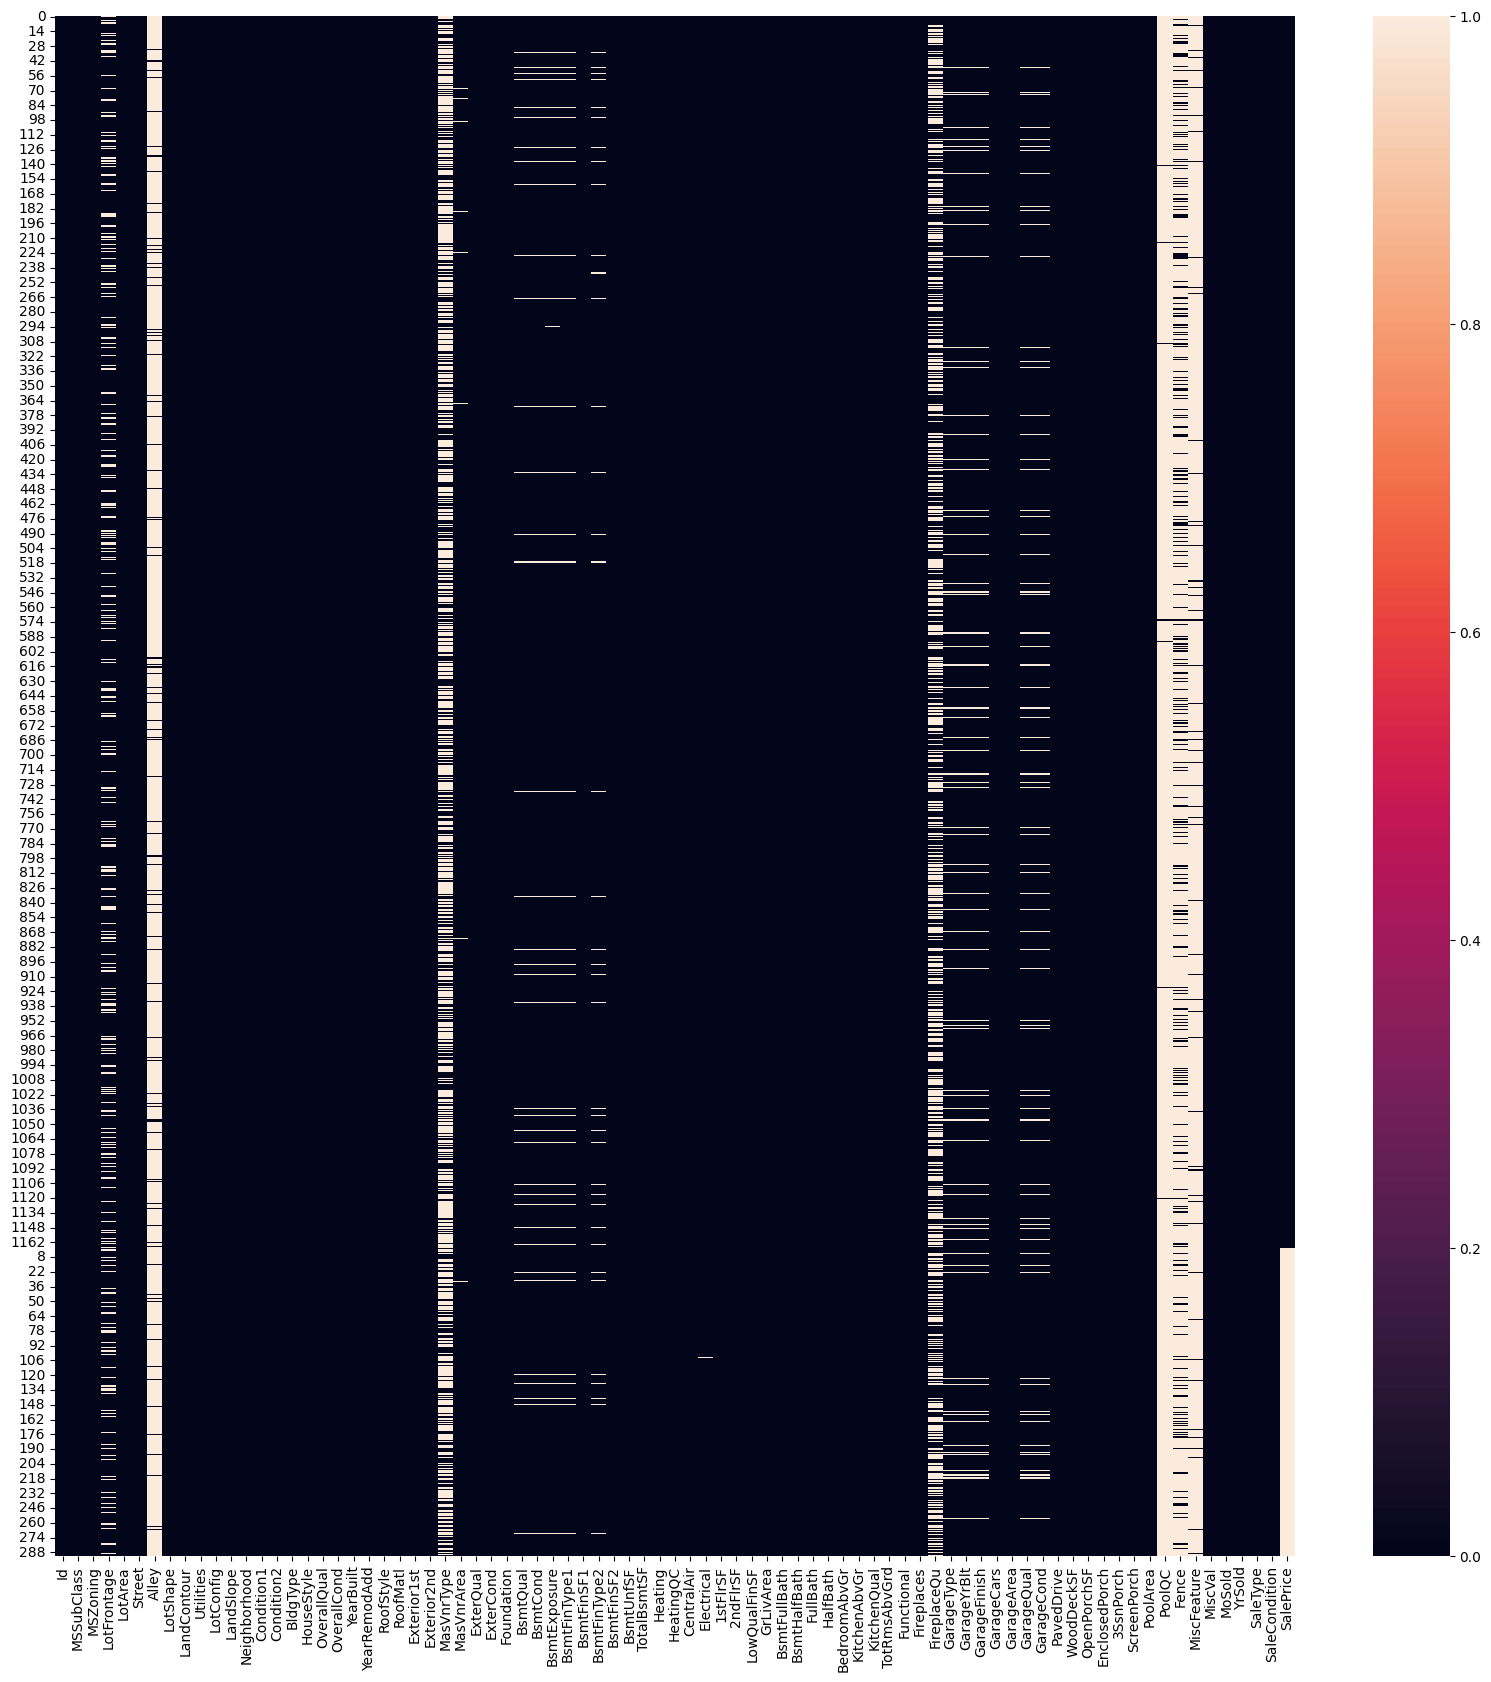

In [3196]:
# print the heatmap and check the null value
plt.figure(figsize=(20,20))
sns.heatmap(df.isnull())

In [3197]:
# select int float datatype
df_int_float=df.select_dtypes(include=["int64","float64"]).columns
df_int_float

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [3198]:
# select object  datatype
df_object=df.select_dtypes(include=["object"]).columns
df_object

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [3199]:
print(df_int_float.shape)

(38,)


In [3200]:
print(df_object.shape)

(43,)


In [3201]:
df.describe() # check the desribtion of dataset

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,181477.005993
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79105.586863
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3202]:
# count null value in percentase
null_count1=df.isnull().sum()/df.shape[0]*100
print("count of null value\n", null_count1)

count of null value
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFin

In [3203]:
# Assuming null_count1 is a Series with null value counts for each column
null_count = null_count1[null_count1 > 20].keys()  # Get column names with more than 20 null values

# Drop those columns
df = df.drop(columns=null_count)

# Print the shape of the DataFrame after dropping the columns
print(df.shape)


(1460, 75)


In [3204]:
# count null value in percentase
null_count=df.isnull().sum()/df.shape[0]*100
print("count of null value\n", null_count1)

count of null value
 Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType       59.726027
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFin

# missing value imputation

In [3205]:

# If the null_count contains non-numeric values (strings), convert them to numeric first

# Now, get columns with missing values greater than 0
missing_value_gre_0 = null_count[null_count > 0]

In [3206]:
# show null categrical data
cata_null_feature=missing_value_gre_0[missing_value_gre_0.keys().isin(df_object)]
cata_null_feature

,0
BsmtQual,2.534247
BsmtCond,2.534247
BsmtExposure,2.602740
BsmtFinType1,2.534247
BsmtFinType2,2.602740
Electrical,0.068493
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945
GarageCond,5.547945


In [3207]:
cata_null_feature.shape

(10,)

In [3208]:
# show null all numerical data
numerical_null_feature=missing_value_gre_0[missing_value_gre_0.keys().isin(df_int_float)]
numerical_null_feature

,0
LotFrontage,17.739726
MasVnrArea,0.547945
GarageYrBlt,5.547945
SalePrice,20.000000


In [3209]:
numerical_null_feature.shape

(4,)

In [3210]:
df_mvi=df.copy()

# missing value      ,  MasVnrArea      0.547945



In [3211]:
#df["MasVnrArea"].value_counts()  # object type


In [3212]:
# masvnrtype fill median value
masvnr_ar=df["MasVnrArea"].median()
df_mvi["MasVnrArea"].replace(np.nan,masvnr_ar,inplace=True)

In [3213]:
#df_mvi["MasVnrType"].isnull().sum() , df_mvi["MasVnrArea"].isnull().sum()

# missing value LotFrontage    17.739726


In [3214]:
# plot distplot and histplot
def newhistplotboxplot(df,figsize=(16,9)):
   plt.figure(figsize=(15,9))
   plt.subplot(121)
   sns.boxplot(df)
   plt.subplot(122)

   sns.distplot(df)

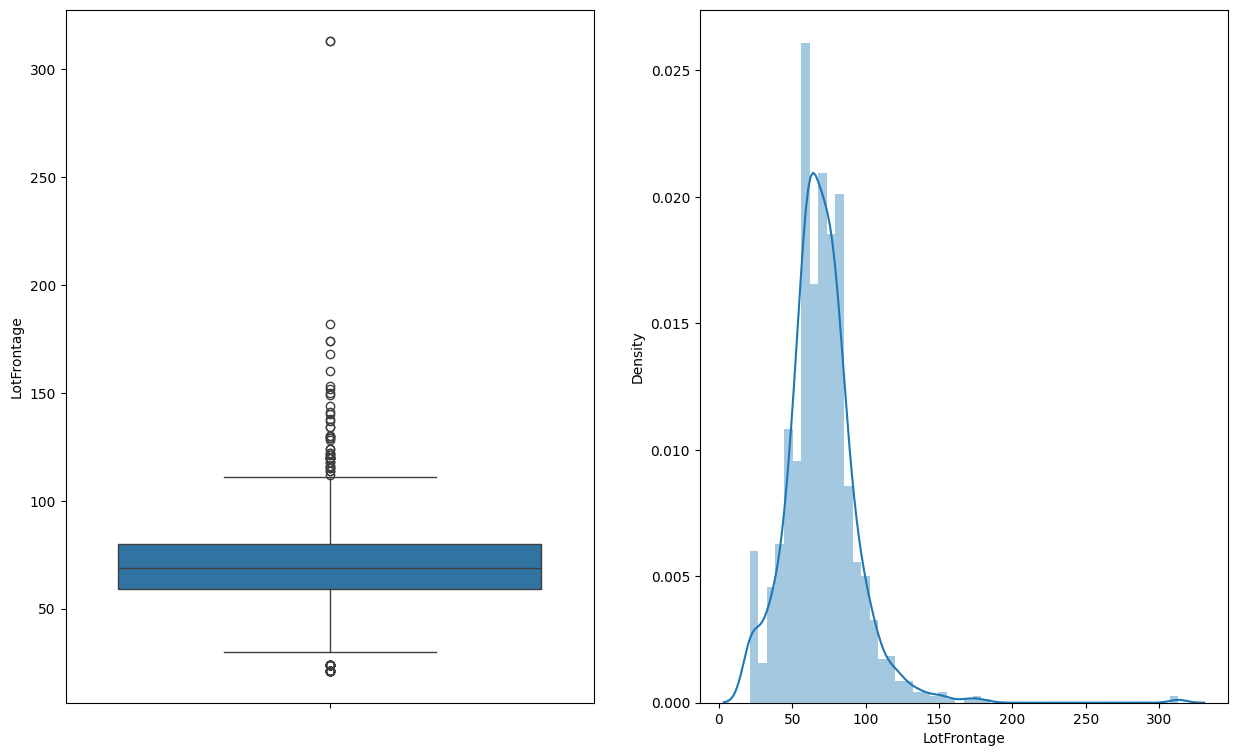

In [3215]:
newhistplotboxplot(df["LotFrontage"])

In [3216]:
# numerical type value and fill the mean value
lotfran=df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan,lotfran,inplace=True)


In [3217]:
df_mvi["LotFrontage"].isnull().sum()

0

# missing vale Electrical       0.068493  
# FireplaceQu     47.260274
4

In [3218]:
df["Electrical"].value_counts()



,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [3219]:
# object type data and fill the mode value
electrical=df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan,electrical,inplace=True)

df_mvi["Electrical"].isnull().sum()

0

BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740

In [3220]:
# all BSMT categrical  feature
cat_var=[
    "BsmtQual",
    "BsmtCond",
    "BsmtExposure",
    "BsmtFinType1",
    "BsmtFinType2"
]
# check the value counts
for feat in cat_var:
    print(df[feat].value_counts())

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64
BsmtCond
TA    1311
Gd      65
Fa      45
Po       2
Name: count, dtype: int64
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64
BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: count, dtype: int64
BsmtFinType2
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64


In [3221]:
# fill na value
bsmt="na"
for feat in cat_var:
    df_mvi[feat].replace(np.nan,bsmt,inplace=True)
df_mvi[feat].isnull().sum()

0

<Axes: >

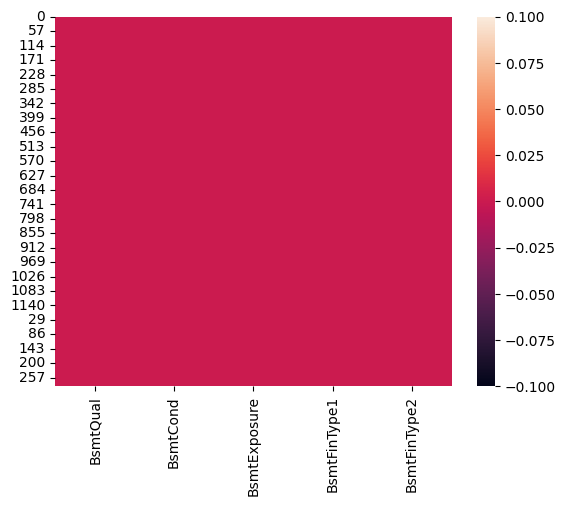

In [3222]:
sns.heatmap(df_mvi[cat_var].isnull())

# missing value garbagetype


 GarageType       5.547945



GarageFinish     5.54794

5
GarageQual       5.5479

45
GarageCond       5.547945

In [3223]:
#  all missing garbase value objectt type
gar=["GarageType","GarageFinish","GarageQual","GarageCond"]
for feat in gar:
    print(df[feat].value_counts())

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64
GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64
GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64
GarageCond
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64


<Axes: >

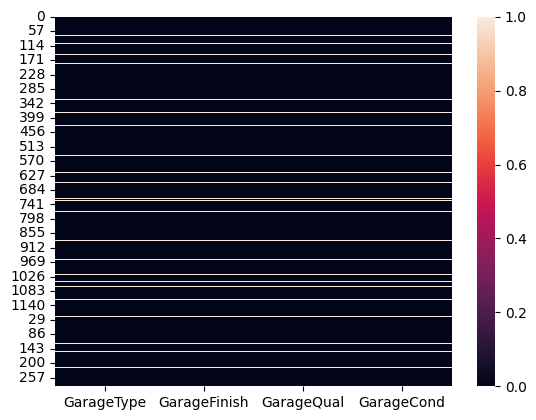

In [3224]:
sns.heatmap(df[gar].isnull())

In [3225]:
# again print the boxplot
#plt.figure(figsize=(40,40))
#graph=1
#for num in gar:
 #   plt.subplot(3,5,graph)
  #  sns.boxplot(data=df[i],orient="v")
   # plt.xlabel(i,fontsize=14)
    #graph+=1
#plt.show()

In [3226]:
# fill na value
bsmt="na"
for feat in gar:

    df_mvi[feat].replace(np.nan,bsmt,inplace=True)

df_mvi[feat].isnull().sum()

0

<Axes: >

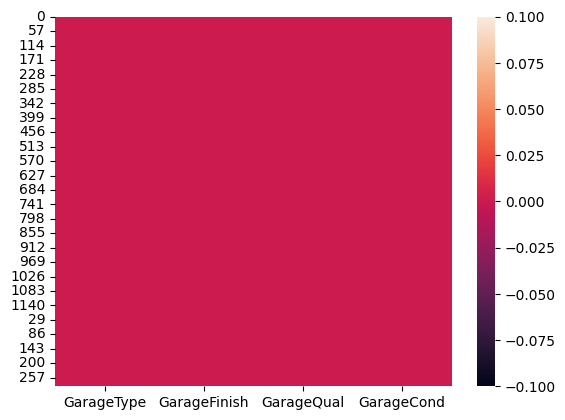

In [3227]:
# print the heatmap
sns.heatmap(df_mvi[gar].isnull())

# GarageYrBlt     5.547945


In [3228]:
# numerical data  fill the mean value
nume=df["GarageYrBlt"].mean()
df_mvi["GarageYrBlt"].replace(np.nan,nume,inplace=True)
df_mvi["GarageYrBlt"].isnull().sum()

0

In [3229]:

#poo=df["MiscFeature"].mode()[0]
#fence=df["Fence"].mode()[0]
#mis=df["PoolQC"].mode()[0]
#df_mvi["MiscFeature"].replace(np.nan,poo,inplace=True)
#df_mvi["Fence"].replace(np.nan,fence,inplace=True)
#df_mvi["PoolQC"].replace(np.nan,mis,inplace=True)


In [3230]:
#df_mvi["MiscFeature"].isnull().sum() ,  df_mvi["Fence"].isnull().sum()  ,  df_mvi["PoolQC"].isnull().sum()

In [3231]:
df_mvi.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
LotShape,0
LandContour,0
Utilities,0
LotConfig,0


In [3232]:
quan = list(df_mvi.loc[:, df.dtypes != 'object'].columns.values)
quan

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

# **DECREASE SKEWNESS NUMERICAL FEATURES**

In [3233]:
# some features skewness are decrease
skewed_features = [
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

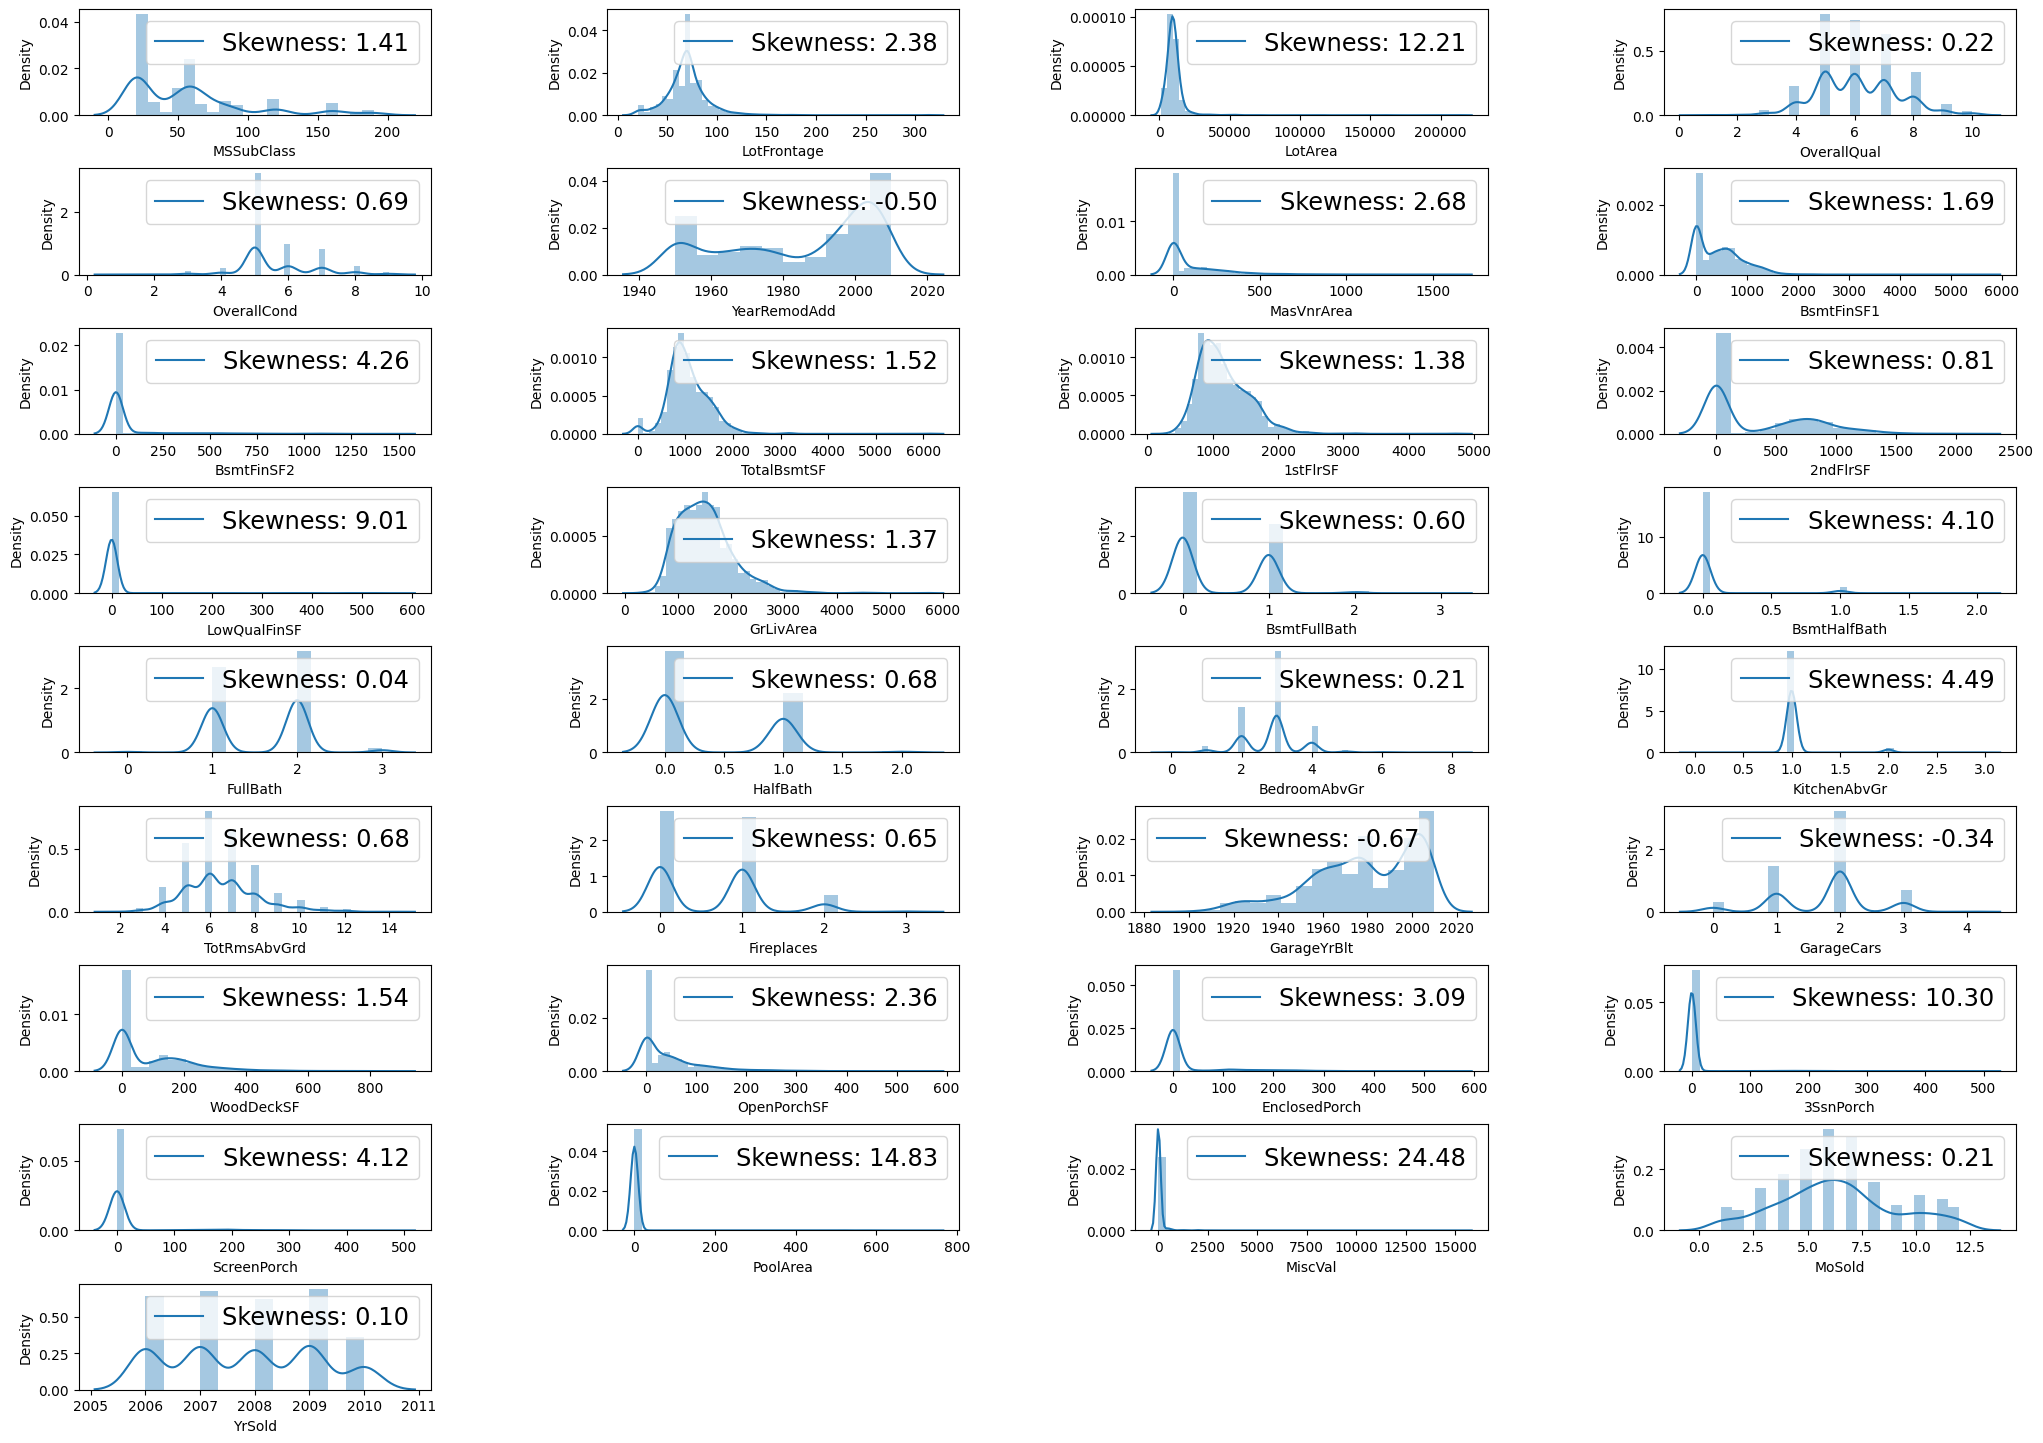

In [3234]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 37:
        plt.subplot(10,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df_mvi[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df_mvi[skewed_features[i]].skew())], fontsize = 'xx-large')

In [3235]:
# decrease the skewnwnes of the data
for i in skewed_features:
    df_mvi[i] = np.log(df_mvi[i] + 1)

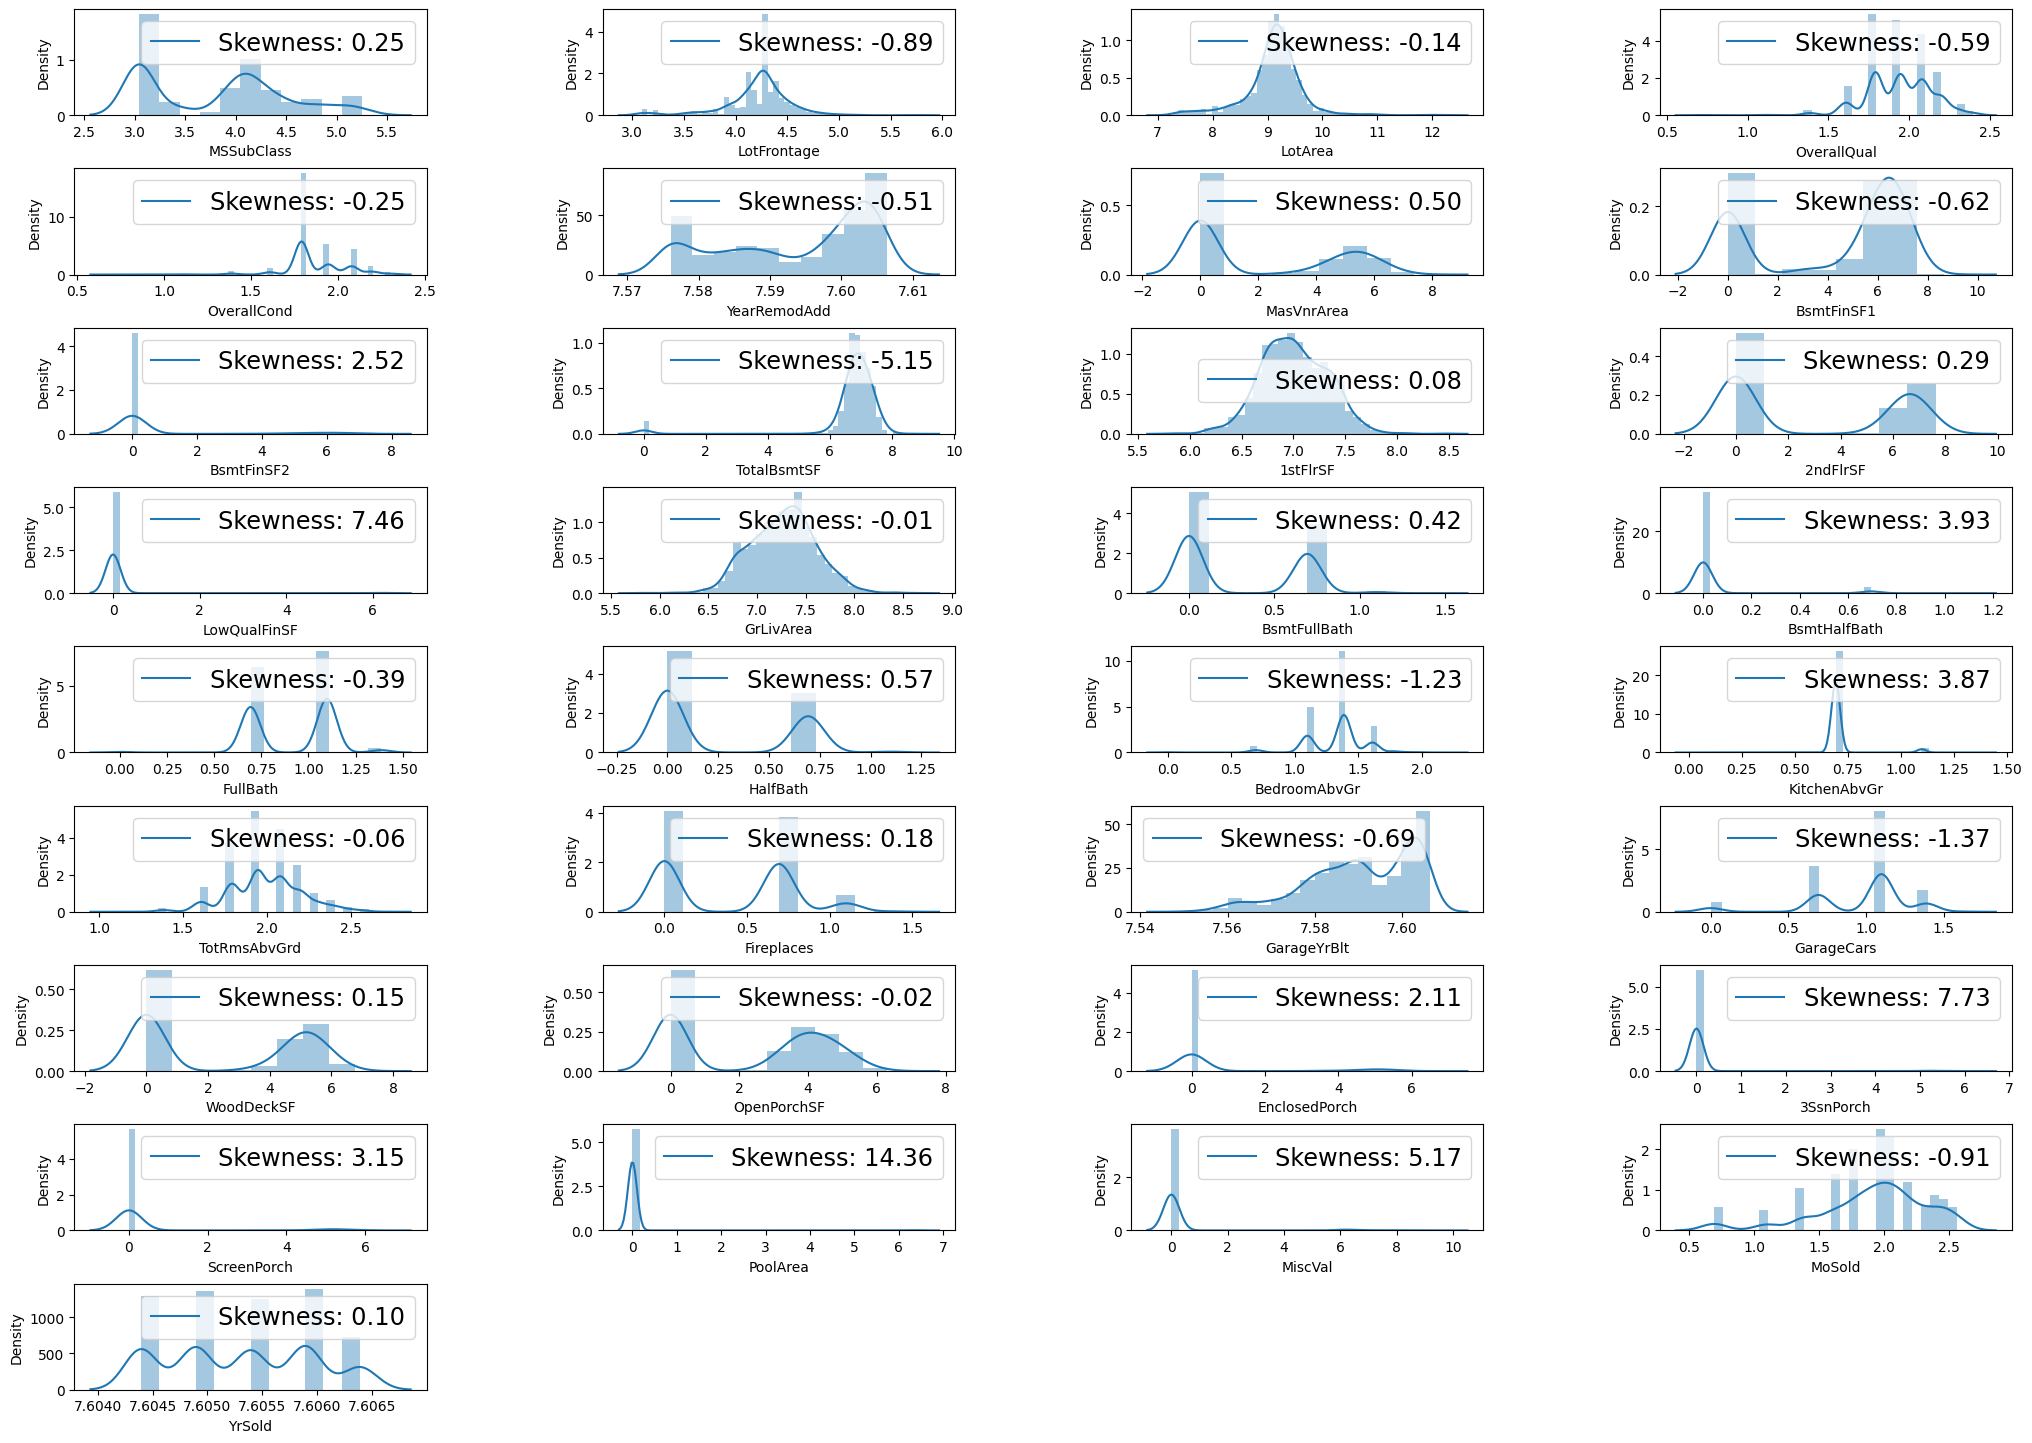

In [3236]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 37:
        plt.subplot(10,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df_mvi[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df_mvi[skewed_features[i]].skew())], fontsize = 'xx-large')

#  convert  categrical feature to numerical feature

> Add blockquote



In [3237]:
# drop id column
_df_mvi=df.drop(columns="Id",axis=True)

In [3238]:
# select object  datatype
df_object=df_mvi.select_dtypes(include=["object"]).columns
df_object

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [3239]:
# select object  datatype
df_object=df_mvi.select_dtypes(include=["int64","float64"]).columns
df_object

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [3240]:
num_feature=["MSSubClass","MoSold","YrSold","GarageYrBlt","YearBuilt","YearRemodAdd"]

In [3241]:
for num in num_feature:
    print(df_mvi[num].dtypes)

float64
float64
float64
float64
int64
float64


In [3242]:
df_mvi[num_feature].head()

,MSSubClass,MoSold,YrSold,GarageYrBlt,YearBuilt,YearRemodAdd
0,4.795791,1.098612,7.604894,7.589842,1976,7.589336
1,3.044522,2.397895,7.604894,7.586296,1970,7.586296
2,4.110874,1.945910,7.604894,7.599902,1996,7.599902
3,3.044522,0.693147,7.606387,7.589842,1977,7.589842
4,3.044522,1.945910,7.605890,7.589842,1977,7.601402


In [3243]:
for var in num_feature:
    df_mvi[var]=df_mvi[var].astype(str)

In [3244]:

for fea in num_feature:
    print(df_mvi[fea].dtypes)

object
object
object
object
object
object


# convert categrical future to numerical feature

In [3245]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuilt     

In [3246]:
df_mvi["BsmtExposure"].value_counts()

,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114
na,38


In [3247]:
# import CAtrgricaldtpe
from pandas.api.types import CategoricalDtype


In [3248]:
# bsmtexposer conver numerical feature
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["na","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [3249]:
# check after count value
df_mvi["BsmtExposure"].value_counts()

,count
BsmtExposure,
1,953
3,221
4,134
2,114
0,38


In [3250]:
df_mvi["ExterQual"].value_counts()

,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


In [3251]:
df_mvi["ExterQual"]=df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes


In [3252]:
df_mvi["ExterQual"].value_counts()

,count
ExterQual,
2,906
3,488
4,52
1,14


In [3253]:
# some ordinal features convert numerical features
df_mvi["ExterCond"]=df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtQual"]=df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["na","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["na","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["HeatingQC"]=df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["KitchenQual"]=df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageQual"]=df_mvi["GarageQual"].astype(CategoricalDtype(categories=["na","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes
df_mvi["GarageCond"]=df_mvi["GarageCond"].astype(CategoricalDtype(categories=["na","Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

df_mvi["BsmtFinType2"]=df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["na","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["BsmtFinType1"]=df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["na","Unf","LwQ","Rec","BLQ","ALQ","GLQ"],ordered=True)).cat.codes
df_mvi["PavedDrive"]=df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N","P","Y"],ordered=True)).cat.codes
df_mvi["Functional"]=df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal","Sev","Maj2","Maj1","Mod","Min2","Min1","Typ"],ordered=True)).cat.codes
df_mvi["Foundation"]=df_mvi["Foundation"].astype(CategoricalDtype(categories=["Wood","Stone","Slab","PConc","CBlock","BrkTil"],ordered=True)).cat.codes
df_mvi["GarageFinish"]=df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["na","Unf","RFn","Fin"],ordered=True)).cat.codes
df_mvi["Utilities"]=df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO","NoSeWa","NoSeWr","AllPub"],ordered=True)).cat.codes

In [3254]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 291
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   int8   
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   float64
 17  OverallCond    1460 non-null   float64
 18  YearBuilt     

# one hot encoding for nominal features

In [3255]:
df_encoder=df_mvi.copy()

In [3256]:
# # all objectt type data
object_feature=df_encoder.select_dtypes(include="object").columns.tolist()
print(object_feature)



# print lenthe of object datatype
print("length of object dtypes:" ,len(object_feature))


['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
length of object dtypes: 27


In [3257]:
# Importiimport pandas as pd

# Getting all object type columns
object_feature = df_encoder.select_dtypes(include="object").columns.tolist()

# Print the object features
print(object_feature)

# Print length of object type columns
print("Length of object dtypes:", len(object_feature))

# Check the shape before encoding
print("Before One-Hot Encoding, Data Shape:", df_encoder.shape)

# Apply one-hot encoding
df_encoder = pd.get_dummies(df_encoder, columns=object_feature, drop_first=True)  # drop_first=True avoids dummy variable trap

# Check the shape after encoding
print("After One-Hot Encoding, Data Shape:", df_encoder.shape)

# Display the first few rows of the dataframe



['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageYrBlt', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']
Length of object dtypes: 27
Before One-Hot Encoding, Data Shape: (1460, 75)
After One-Hot Encoding, Data Shape: (1460, 482)


In [3258]:
df_encoder.head()

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_3.4339872044851463,MSSubClass_3.713572066704308,MSSubClass_3.828641396489095,MSSubClass_3.9318256327243257,MSSubClass_4.110873864173311,MSSubClass_4.2626798770413155,MSSubClass_4.330733340286331,MSSubClass_4.394449154672439,MSSubClass_4.454347296253507,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_5.081404364984463,MSSubClass_5.198497031265826,MSSubClass_5.25227342804663,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_7.5766097669730375,YearRemodAdd_7.577121930876679,YearRemodAdd_7.577633832602728,YearRemodAdd_7.578145472419466,YearRemodAdd_7.578656850594762,YearRemodAdd_7.579167967396076,YearRemodAdd_7.579678823090456,YearRemodAdd_7.5801894179

In [3259]:
df_encoder["Utilities"].isnull().sum()

0

In [3260]:
# check object dtypes
object_feature=df_encoder.select_dtypes(include="object").columns.tolist()
object_feature

[]

In [3261]:
df_encoder.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Utilities', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=482)

In [3262]:
df_encoder.head(5)

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,MSSubClass_3.4339872044851463,MSSubClass_3.713572066704308,MSSubClass_3.828641396489095,MSSubClass_3.9318256327243257,MSSubClass_4.110873864173311,MSSubClass_4.2626798770413155,MSSubClass_4.330733340286331,MSSubClass_4.394449154672439,MSSubClass_4.454347296253507,MSSubClass_4.51085950651685,MSSubClass_4.795790545596741,MSSubClass_5.081404364984463,MSSubClass_5.198497031265826,MSSubClass_5.25227342804663,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_7.5766097669730375,YearRemodAdd_7.577121930876679,YearRemodAdd_7.577633832602728,YearRemodAdd_7.578145472419466,YearRemodAdd_7.578656850594762,YearRemodAdd_7.579167967396076,YearRemodAdd_7.579678823090456,YearRemodAdd_7.5801894179

In [3263]:
df_encoder.describe()

,Id,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.00000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1168.000000
mean,730.500000,4.217092,9.110966,2.998630,1.940309,1.869266,2.120264,2.39589,2.083562,3.603425,3.489041,2.934932,1.630137,3.545890,4.229731,1.247260,0.655398,567.240411,6.750560,3.145205,7.008452,2.864586,0.099814,7.268512,0.291395,0.039486,0.917827,0.263025,1.327943,0.711673,2.511644,1.994407,6.841781,0.399875,1.715753,0.972599,472.980137,2.810274,2.808904,1.856164,2.457206,2.308541,0.698019,0.085679,0.410671,0.030431,0.233456,181477.005993
std,421.610009,0.314733,0.517369,0.052342,0.201983,0.168400,2.628759,0.57428,0.351054,0.722394,0.876478,0.552159,1.067391,2.107776,2.992052,0.892332,1.845045,441.866955,1.145712,0.959501,0.317431,3.293311,0.747354,0.333303,0.349839,0.162599,0.223281,0.341869,0.229907,0.089268,0.663760,0.214246,0.667698,0.394660,0.892831,0.322269,213.804841,0.722898,0.719685,0.496592,2.596435,2.152387,1.727317,0.666876,1.403194,0.438685,1.226030,79105.586863
min,1.000000,3.091042,7.170888,1.000000,0.693147,0.693147,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.814131,0.000000,0.000000,5.814131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.098612,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,4.110874,8.929898,3.000000,1.791759,1.791759,0.000000,2.00000,2.000000,3.000000,3.000000,3.000000,1.000000,1.000000,0.000000,1.000000,0.000000,223.000000,6.680541,2.000000,6.783325,0.000000,0.000000,7.030415,0.000000,0.000000,0.693147,0.000000,1.098612,0.693147,2.000000,1.791759,7.000000,0.000000,1.000000,0.693147,334.500000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130375.000000
50%,730.500000,4.263383,9.156887,3.000000,1.945910,1.791759,0.000000,2.00000,2.000000,4.000000,4.000000,3.000000,1.000000,4.000000,5.951943,1.000000,0.000000,477.500000,6.900227,4.000000,6.992096,0.000000,0.000000,7.289611,0.000000,0.000000,1.098612,0.000000,1.386294,0.693147,2.000000,1.945910,7.000000,0.693147,2.000000,1.098612,480.000000,3.000000,3.000000,2.000000,0.000000,3.258097,0.000000,0.000000,0.000000,0.000000,0.000000,163995.000000
75%,1095.250000,4.382027,9.358976,3.000000,2.079442,1.945910,5.107456,3.00000,2.000000,4.000000,4.000000,3.000000,2.000000,6.000000,6.569832,1.000000,0.000000,808.000000,7.169542,4.000000,7.238676,6.591674,0.000000,7.483104,0.693147,0.000000,1.098612,0.693147,1.386294,0.693147,3.000000,2.079442,7.000000,0.693147,2.000000,1.098612,576.000000,3.000000,3.000000,2.000000,5.129899,4.234107,0.000000,0.000000,0.000000,0.000000,0.000000,215000.000000
max,1460.000000,5.749393,12.279537,3.000000,2.397895,2.302585,7.378384,4.00000,4.000000,5.000000,5.000000,4.000000,4.000000,6.000000,8.638525,6.000000,7.296413,2336.000000,8.717846,4.000000,8.453827,7.633370,6.350886,8.638171,

In [3264]:
df_encoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 291
Columns: 482 entries, Id to SaleCondition_Partial
dtypes: bool(434), float64(29), int64(3), int8(16)
memory usage: 1018.0 KB


In [3265]:
 #print the heatmap
#plt.figure(figsize=(60,60))
#sns.heatmap(abs(df_encoder.corr()),annot=True) # check the correelation

In [3266]:
#df_encoder.corr()

In [3267]:
df_encoder.shape

(1460, 482)

In [3268]:
abs(df_encoder.corr()["SalePrice"]).sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.743187
GrLivArea,0.694741
ExterQual,0.672665
KitchenQual,0.659228
GarageArea,0.619000
BsmtQual,0.585348
1stFlrSF,0.577123
GarageCars,0.568383
GarageFinish,0.550624


<Axes: title={'center': 'corr with label'}>

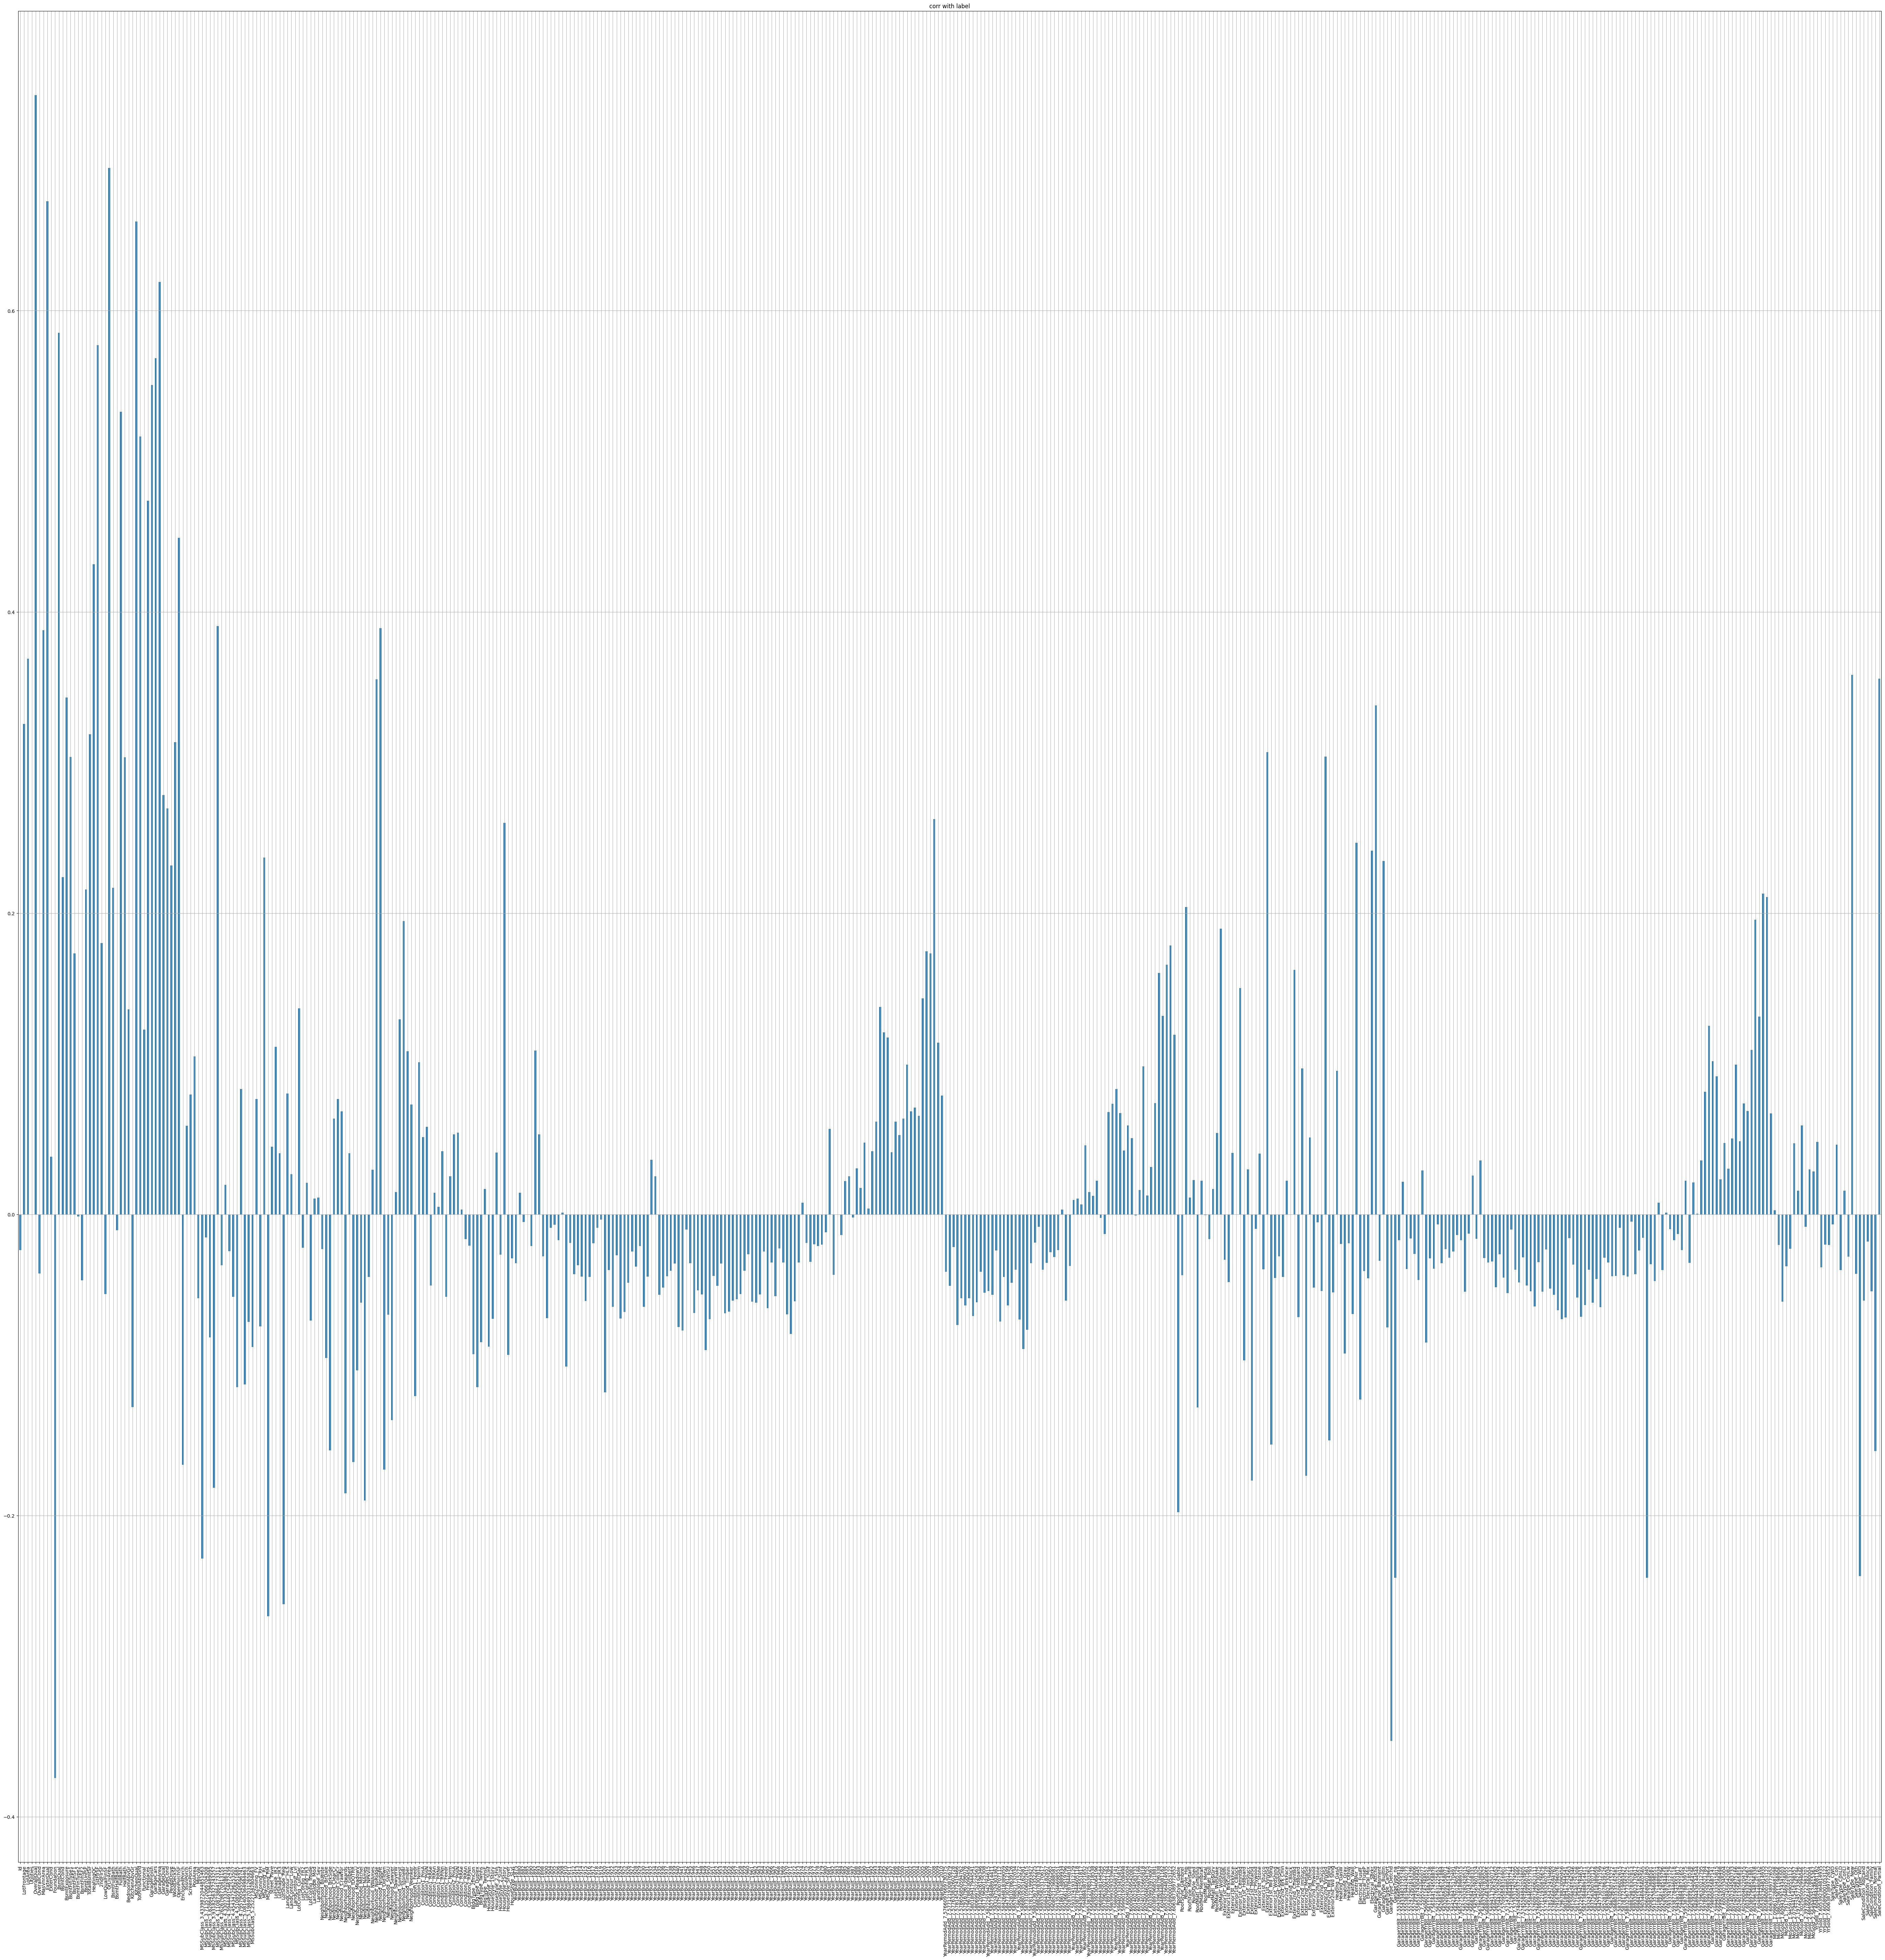

In [3269]:
# correlation with SALEPRICE
df_encoder.drop("SalePrice",axis=1).corrwith(df_encoder["SalePrice"]).plot(kind="bar",grid=True,title="corr with label",figsize=(70,70)) # corr with SALEPRICE

In [3270]:
df_encoder.shape

(1460, 482)

# DATA PREPROCESSING

In [3271]:
# length of x train daata
length_x=len(df_train)
length_x
X=df_encoder[:length_x].drop(columns="SalePrice")

y=df_encoder["SalePrice"][:length_x]

x_test=df_encoder[length_x:].drop(columns="SalePrice")

In [3272]:
x=X

# split train data train_test_split

In [3273]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=148)
print("the shape of x_train",x_train.shape)
print("the shape of x_val",x_val.shape)
print("the shape of y_train",y_train.shape)
print("the shape of y_val",y_val.shape)

the shape of x_train (934, 481)
the shape of x_val (234, 481)
the shape of y_train (934,)
the shape of y_val (234,)


# NORMALIZATION AND STANDIZATION

 it is data normaly distributed and reduce the skewness use of powertrnasform

In [3274]:
# help stabilize variance, reduce skewness, and make relationships more linear.
from sklearn.preprocessing import PowerTransformer

# Initialize powertransform with normal distribution
pt = PowerTransformer(method='yeo-johnson')
# Fit and transform the training data
qt_train = pt.fit_transform(x_train)

# Transform the validation and test data without refitting
qt_val = pt.transform(x_val)
qt_test = pt.transform(x_test)
# create the data fram for train data


# scale the data using Robust scaler

In [3275]:
#  RobustScaler is a method that reduces the impact of outliers
#scales the data based on the median and interquartile range (IQR)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# fit and transform train data
x_train1=sc.fit_transform(qt_train)
x_val=sc.transform(qt_val)
#transform test data
x_test1=sc.transform(qt_test)



# train model

# LinearRegression

In [3276]:
from sklearn.linear_model import LinearRegression
# import the r2_score and mean_abosolute_error
from sklearn.metrics import r2_score , mean_absolute_error ,mean_squared_error
lr=LinearRegression()
# fit the train model
lr.fit(x_train1,y_train)
# predicted the x_val
y_pred=lr.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))
mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))
print(np.sqrt(mse))


score of model 0.7242872818878792
score of mean_absolute_error 26671.797319751608
39910.47705445072


In [3277]:
# Apply Ridge Regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)  # Alpha controls regularization strength
ridge.fit(x_train1, y_train)

# Predictions and evaluation
ridge_predictions = ridge.predict(x_val)


# check the score
print("score of model",r2_score(y_val,ridge_predictions))

# check the mean_absolute_error
mse=mean_squared_error(y_val,ridge_predictions)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,ridge_predictions))
print(np.sqrt(mse))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(ridge,x_train1,y_train,scoring='r2',title="Ridge")

score of model 0.7395820246069779
score of mean_absolute_error 26092.977526721552
38787.697343484935


In [3278]:
# Apply Ridge Regression
from sklearn.linear_model import Lasso
las = Lasso(alpha=1.0)  # Alpha controls regularization strength
las.fit(x_train1, y_train)

# Predictions and evaluation
las_predictions = las.predict(x_val)


# check the score
print("score of model",r2_score(y_val,las_predictions))

# check the mean_absolute_error
mse=mean_squared_error(y_val,las_predictions)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,las_predictions))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(ridge,x_train1,y_train,scoring='r2',title="Ridge")

score of model 0.7264975796610773
score of mean_absolute_error 26548.595157888096


In [3279]:
# ensemble learning

# GradientBoostingRegressor

In [3280]:
from sklearn.ensemble import GradientBoostingRegressor
# import the r2_score and mean_abosolute_error
from sklearn.metrics import r2_score , mean_absolute_error
GBR= GradientBoostingRegressor()  # Add pruning to reduce complexity
# fit the train model
GBR.fit(x_train1,y_train)
# predicted the x_val
y_pred=GBR.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))

# check the mean_absolute_error
mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(GBR,x_train1,y_train,scoring='r2',title="GradientBoostingRegressor")

score of model 0.9187980133732923
score of mean_absolute_error 14564.286708758518


In [3281]:


# check the mean abosolute errors high and midiam
print("Target Variable Range:")
print("Min:", y_val.min())
print("Max:", y_val.max())
print("Mean:", y_val.mean())

Target Variable Range:
Min: 52500.0
Max: 466500.0
Mean: 186829.61111111112


# RandomForestRegressor

In [3282]:
from sklearn.ensemble import RandomForestRegressor
# import the r2_score and mean_abosolute_error
from sklearn.metrics import r2_score , mean_absolute_error
RF=RandomForestRegressor()
# fit the train model
RF.fit(x_train1,y_train)
# predicted the x_val
y_pred=RF.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))

mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(RF,x_train1,y_train,scoring='r2',title="RandomForestRegressor")

score of model 0.9026541411756043
score of mean_absolute_error 16454.90982905983


# xgboost

In [3283]:

from xgboost import XGBRegressor
# import the r2_score and mean_abosolute_error
from sklearn.metrics import r2_score , mean_absolute_error
XGB=XGBRegressor()
# fit the train model
XGB.fit(x_train1,y_train)
# predicted the x_val
y_pred=XGB.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))

# calculate the mean square errors
mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))
print(np.sqrt(mse))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(XGB,x_train1,y_train,scoring='r2',title="XGBRegressor")

score of model 0.8778033423560688
score of mean_absolute_error 17967.396200587606
26569.793718815872


In [3284]:
# check the mean abosolute errors high and midiam
print("Target Variable Range:")
print("Min:", y_train.min())
print("Max:", y_train.max())
print("Mean:", y_train.mean())

Target Variable Range:
Min: 34900.0
Max: 755000.0
Mean: 180135.9892933619


# DECISSION TREEE REGGRESSER

In [3285]:
# decission tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
# fit the train model
dt.fit(x_train1,y_train)
# predicted the x_val
y_pred=dt.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))

# check the mean_absolute_error

# calculate the mean square errors
mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))
print(np.sqrt(mse))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(dt,x_train1,y_train,scoring='r2',title="DecisionTreeRegressor")

score of model 0.8454242595395696
score of mean_absolute_error 21279.517094017094
29883.343497145295


# SVR

In [3286]:
from sklearn.svm import SVR
svr=SVR()
# fit the train model
svr.fit(x_train1,y_train)
# predicted the x_val
y_pred=dt.predict(x_val)

# check the score
print("score of model",r2_score(y_val,y_pred))



# calculate the mean square errors
mse=mean_squared_error(y_val,y_pred)

# check the mean_absolute_error
print("score of mean_absolute_error",mean_absolute_error(y_val,y_pred))
print(np.sqrt(mse))

# print skplot
#import scikitplot as skplt
#skplt.estimators.plot_learning_curve(svr,x_train1,y_train,scoring='r2',title="SVR")

score of model 0.8454242595395696
score of mean_absolute_error 21279.517094017094
29883.343497145295


## ***cross_validation***




In [3287]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=5)
print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.5480903960848679


In [3288]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(ridge,x,y,cv=5)
print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.7555493582393249


In [3289]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(GBR,x,y,cv=5)
print("score of after crossvalidation",np.mean(scr))

score of after crossvalidation 0.8668350724630022


In [3290]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(RF,x,y,cv=5)
print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.8395249445554039


In [3291]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svr,x,y,cv=5)
print("score of after crossvalidation",scr.mean())

score of after crossvalidation -0.062155247129557445


In [3292]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=5)
print("score of after crossvalidation",scr.mean())

score of after crossvalidation 0.6911441222931779


# HYPERPARAMETER TUNING

# * hyperparmeter tuning with gradiantboosting regressor

In [3294]:
 #Define parameter grid for RandomizedSearchCV
 from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(GBR, threshold="median")  # Keep only top 50% features
X_train_selected = selector.fit_transform(x_train1, y_train)
X_test_selected = selector.transform(x_val)
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 150,200,300,400],  # Reduce estimators (avoid too many trees)
    'learning_rate': [0.01, 0.05, 0.1,0.02,0.03,0.08],  # Smaller learning rate for better optimization
    'max_depth': [1,2], # keep depth for low regularization
    'min_samples_split': [10, 20, 30,5,15,25], # Avoid overfitting
    'min_samples_leaf': [5, 10, 15,20,25],    # min leaf node
    'subsample': [0.7,0.6,0.8, 0.9, 1.0], # Increase randomness //# Use  data per tree
    'max_features': ['sqrt'],
}

# Perform RandomizedSearchCV for tuning hyperparameters with 5-fold cross-validation
random_search_gbr = RandomizedSearchCV(GBR, param_distributions=param_dist, n_iter=10, cv=5,n_jobs=-1 , random_state=42) # Increase folds for better validation

#  Fit the RandomizedSearchCV
random_search_gbr.fit(X_train_selected, y_train)

#  Get the best parameters from the search
best_params = random_search_gbr.best_params_
print(f'Best Hyperparameters: {best_params}')

#  Train the model with the best parameters
best_gbr_model = random_search_gbr.best_estimator_

#  Predict on the test set
y_pred = best_gbr_model.predict(X_test_selected)

#  Evaluate the model with Accuracy Score
print("the score of model",r2_score(y_val, y_pred))




Best Hyperparameters: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 25, 'max_features': 'sqrt', 'max_depth': 1, 'learning_rate': 0.1}
the score of model 0.8876963147017563


# hyperparameter tuning with RandomForestRegressor

In [3304]:
 #Define parameter grid for RandomizedSearchCV
 from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(RF, threshold="median")  # Keep only top 50% features
X_train_selected = selector.fit_transform(x_train1, y_train)
X_test_selected = selector.transform(x_val)
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200],
    'max_depth': [10, 15, 20,25,30],
    'min_samples_split': [5, 10,4,15],
    'min_samples_leaf': [ 4,5,6,7],
    'max_features': ['sqrt']
}

#  Perform RandomizedSearchCV for tuning hyperparameters with 5-fold cross-validation
random_search_rf = RandomizedSearchCV(RF, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)

#  Fit the RandomizedSearchCV
random_search_rf.fit(X_train_selected, y_train)

#  Get the best parameters from the search
best_params = random_search_rf.best_params_
print(f'Best Hyperparameters: {best_params}')

#  Train the model with the best parameters
best_rf_model = random_search_rf.best_estimator_

#  Predict on the test set
y_pred = best_rf_model.predict(X_test_selected)

#  Evaluate the model with Accuracy Score
print("the score of model",r2_score(y_val, y_pred))


Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 25}
the score of model 0.8763984030245994


# hyperparamerter tuning with XGBRegressor

In [3297]:
 #Define parameter grid for RandomizedSearchCV
#from sklearn.model_selection import RandomizedSearchCV

#param_dist = {
 #   'n_estimators': [100, 200, 300],  # Boosting rounds
  #  'learning_rate': [0.01, 0.05, 0.1],  # Lower learning rate
   # 'max_depth': [3, 4, 5],  # Shallower trees
    #'min_child_weight': [3, 5, 7],  # Minimum instances for splitting
    #'subsample': [0.7, 0.8, 0.9],  # Fraction of samples for each tree
    #'colsample_bytree': [0.7, 0.8],  # Fraction of features to use
   # 'gamma': [0.1, 0.2],  # Minimum loss reduction to partition further
  #  'reg_alpha': [0, 0.1, 0.5],  # L1 regularization
 #   'reg_lambda': [0, 0.1, 0.5]  # L2 regularization
#}

#  Perform RandomizedSearchCV for tuning hyperparameters with 5-fold cross-validation
#random_search_xgb = RandomizedSearchCV(XGB, param_distributions=param_dist, n_iter=10, cv=5,n_jobs=-1, random_state=42)

#  Fit the RandomizedSearchCV

#random_search_xgb.fit(x_train1, y_train)

#  Get the best parameters from the search
#3best_params = random_search_xgb.best_params_
#print(f'Best Hyperparameters: {best_params}')

#  Train the model with the best parameters
#best_xgb_model = random_search_xgb.best_estimator_

#  Predict on the test set
#y_pred = best_xgb_model.predict(x_val)

#  Evaluate the model with Accuracy Score
#print("the score of model",r2_score(y_val, y_pred))


In [3298]:
from sklearn.model_selection import RandomizedSearchCV
# some paarammeeter  for hyperparamter tuning
parms={

    "criterion":["squared_error", "friedman_mse", "absolute_error"],
    "splitter":["best", "random"],
    "max_depth":[10,15,25,30],
    "min_samples_split":[2,4,6],
    "min_samples_split":[2,3,4,5]

}
# used of randomizedsearchcv for hyperparameter tuning
ramdom_search=RandomizedSearchCV(dt,param_distributions=parms,cv=5,n_jobs=-1,n_iter=10,scoring="r2")
# fit the train
ramdom_search.fit(x_train1,y_train)

#  the best parameter andbest estimtor
print("best parameter",ramdom_search.best_params_)
best_dt_estimator=ramdom_search.best_estimator_

# predict the x_test with best parameter
y_pred_dt=best_dt_estimator.predict(x_val)

# calcutlate the r2_score and mean_absolute errors with best_estimator
print("the score of DecissionTree",r2_score(y_val,y_pred_dt))

best parameter {'splitter': 'random', 'min_samples_split': 5, 'max_depth': 25, 'criterion': 'absolute_error'}
the score of DecissionTree 0.6397434022415487


# GradientBoostingRegressor is a best model with proper hyperparameter tuninig and crossvalidation

In [3299]:
 # using pickle and save the model
import pickle

# save the machine learning model
pickle.dump(best_gbr_model,open("house_proce_prediction.pickle","wb"))

# load the machine learning mode
loaded_model = pickle.load(open("house_proce_prediction.pickle", "rb"))

y_pred = loaded_model.predict(x_test1)
# Convert predictions into a DataFrame
predictions_df = pd.DataFrame({
    "Predicted Prices": y_pred
})

# Save the DataFrame to a CSV file
predictions_df.to_csv("predicted_prices.csv", index=False)

print("Predictions saved to 'predicted_prices.csv'")

Predictions saved to 'predicted_prices.csv'
